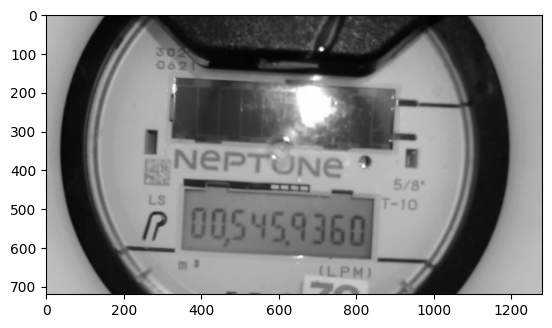

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import subprocess
import shlex
import cv2
import analyze
from  importlib import reload

import os 
dir_path = os.path.abspath('')

img_file = 'images/foo.png'
img_file = 'images/foo2.png'
#img_file = 'data/ocr_error.jpeg'
#img_file = 'data/003781217.jpeg'

img_orig = cv2.imread(img_file)
img_orig = cv2.rotate(img_orig, cv2.ROTATE_180)
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

[array([946, 490,  13]), array([296, 130,  10])]


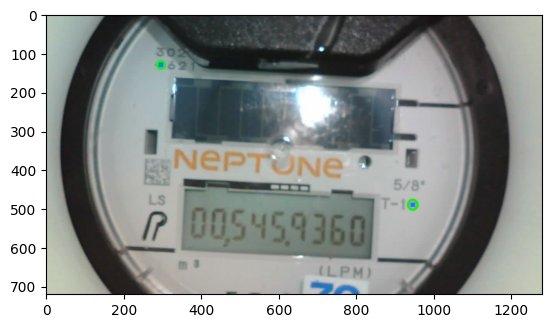

In [90]:


def find_circles(img):
    gray = img
    rows = gray.shape[0]
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                param1=50, param2=25,
                                minRadius=5, maxRadius=15)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        circles = sorted(list(circles), key=lambda x : x[0], reverse=True) #always pick the right-most circle
    return circles
circles = find_circles(img)

print(circles)
output = img_orig.copy()
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    #
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    plt.imshow(output)



True

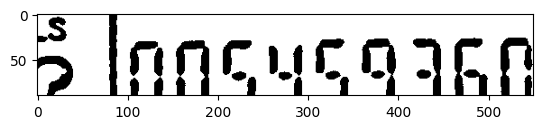

In [ ]:

reload(analyze)
img2 = analyze.simplify(circles, img)
plt.imshow(img2, cmap='gray')
outname  = 'out.png'
cv2.imwrite(outname, img2)

In [97]:
cmd = f'./ssocr -d -1 -i 1 -n 2 {outname}'
result = subprocess.check_output(shlex.split(cmd)).strip()
print(result)

b'05459360'
